**Hedonic Pricing**

1. Clean the data and perform some EDA and visualization to get to know the data set.

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
count,976,976.000000,976,976,976.000000,976.000000,976.000000,976,976,976,9.760000e+02
unique,16,NaN,15,5,NaN,NaN,NaN,3,5,2,NaN
top,Hyundai,NaN,white,hatchback,NaN,NaN,NaN,petrol,5-Speed,Manual,NaN
freq,305,NaN,200,484,NaN,NaN,NaN,783,749,712,NaN
mean,NaN,2016.963115,NaN,NaN,41571.195697,1.165984,5.095287,NaN,NaN,NaN,7.410195e+05
std,NaN,2.818742,NaN,NaN,24390.995134,0.383119,0.446224,NaN,NaN,NaN,3.673234e+05
min,NaN,2011.000000,NaN,NaN,1117.000000,1.000000,4.000000,NaN,NaN,NaN,1.880000e+05
25%,NaN,2015.000000,NaN,NaN,22676.750000,1.000000,5.000000,NaN,NaN,NaN,4.757500e+05
50%,NaN,2017.000000,NaN,NaN,37570.500000,1.000000,5.000000,NaN,NaN,NaN,6.665000e+05
75%,NaN,2019.000000,NaN,NaN,57421.250000,1.000000,5.000000,NaN,NaN,NaN,8.830000e+05


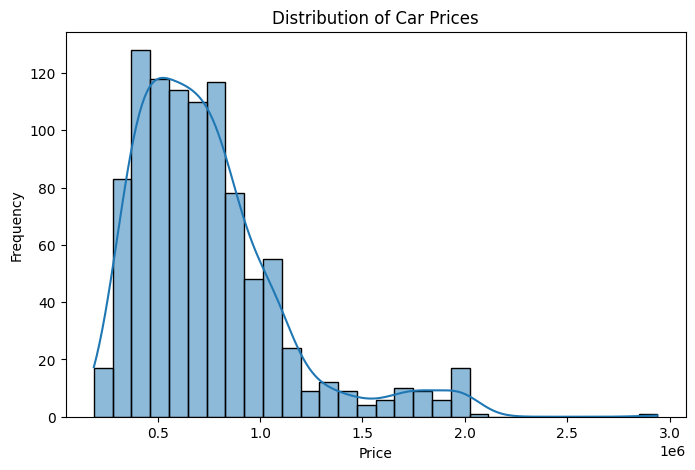

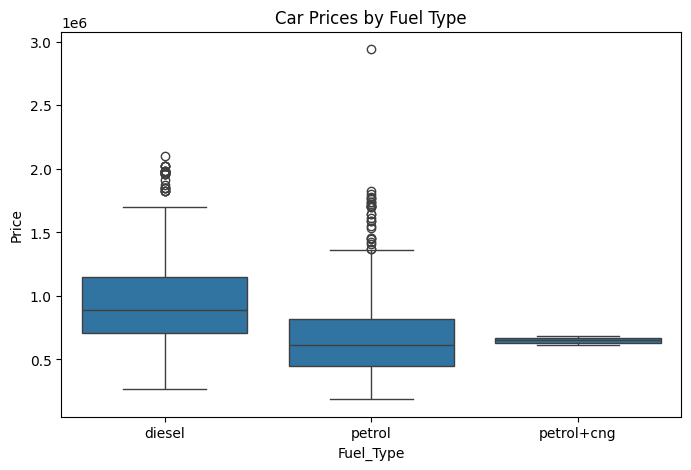

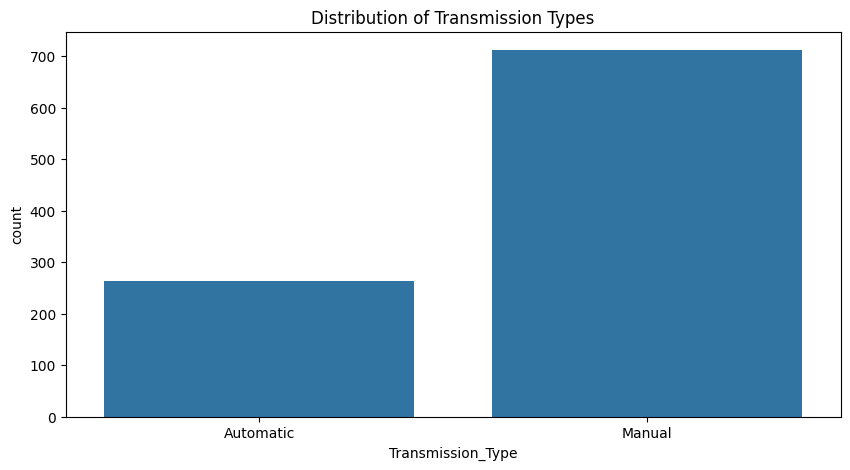

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('cars_hw.csv')

# Clean the data
df_clean = df.drop(columns=['Unnamed: 0'])
df_clean['No_of_Owners'] = df_clean['No_of_Owners'].str.extract('(\d)').astype(int)

# Summary statistics
summary = df_clean.describe(include='all')
display(summary)

# Visualizations
# 1. Distribution of car prices
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot of prices by fuel type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel_Type', y='Price', data=df_clean)
plt.title('Car Prices by Fuel Type')
plt.show()

# 3. Count of transmission types
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x='Transmission_Type')
plt.title('Distribution of Transmission Types')
plt.show()

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [16]:
df_transformed = pd.get_dummies(df_clean, drop_first=True)
display(df_transformed.head())

,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity,Price,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,...,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
0,2017,44611,1,5,657000,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,2016,20305,1,5,682000,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,True
2,2019,29540,2,5,793000,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,True
3,2017,35680,1,5,414000,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2017,25126,1,5,515000,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,True


3. Implement an 80/20 train-test split. Put the test data aside.

In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_transformed.drop(columns=['Price'])
y = df_transformed['Price']

# Perform 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (780, 44)
X_test shape: (196, 44)
y_train shape: (780,)
y_test shape: (196,)


4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and on the both the training and test sets. Which of your models does the best?

In [18]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize and fit linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
train_preds = lr_model.predict(X_train)
test_preds = lr_model.predict(X_test)

# Evaluation metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
train_r2 = r2_score(y_train, train_preds)

test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
test_r2 = r2_score(y_test, test_preds)

# Initialize and fit Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Predict on training and test data
ridge_train_preds = ridge_model.predict(X_train)
ridge_test_preds = ridge_model.predict(X_test)

# Evaluate Ridge model
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_preds))
ridge_train_r2 = r2_score(y_train, ridge_train_preds)

ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_preds))
ridge_test_r2 = r2_score(y_test, ridge_test_preds)

# Print results
print("Ridge Regression Performance:")
print("Training RMSE:", ridge_train_rmse)
print("Training R²:", ridge_train_r2)
print("Test RMSE:", ridge_test_rmse)
print("Test R²:", ridge_test_r2)

# Print results
print("Training RMSE:", train_rmse)
print("Training R²:", train_r2)
print("Test RMSE:", test_rmse)
print("Test R²:", test_r2)

Ridge Regression Performance:
Training RMSE: 143858.96352137567
Training R²: 0.8517315311538282
Test RMSE: 144231.67286164354
Test R²: 0.8186260261734175
Training RMSE: 142154.19343476923
Training R²: 0.8552247578997088
Test RMSE: 143815.30276718995
Test R²: 0.8196717007174028


Both models perform very similarly. Linear Regression slightly does better than Ridge with lower RMSE and higher R².

5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?


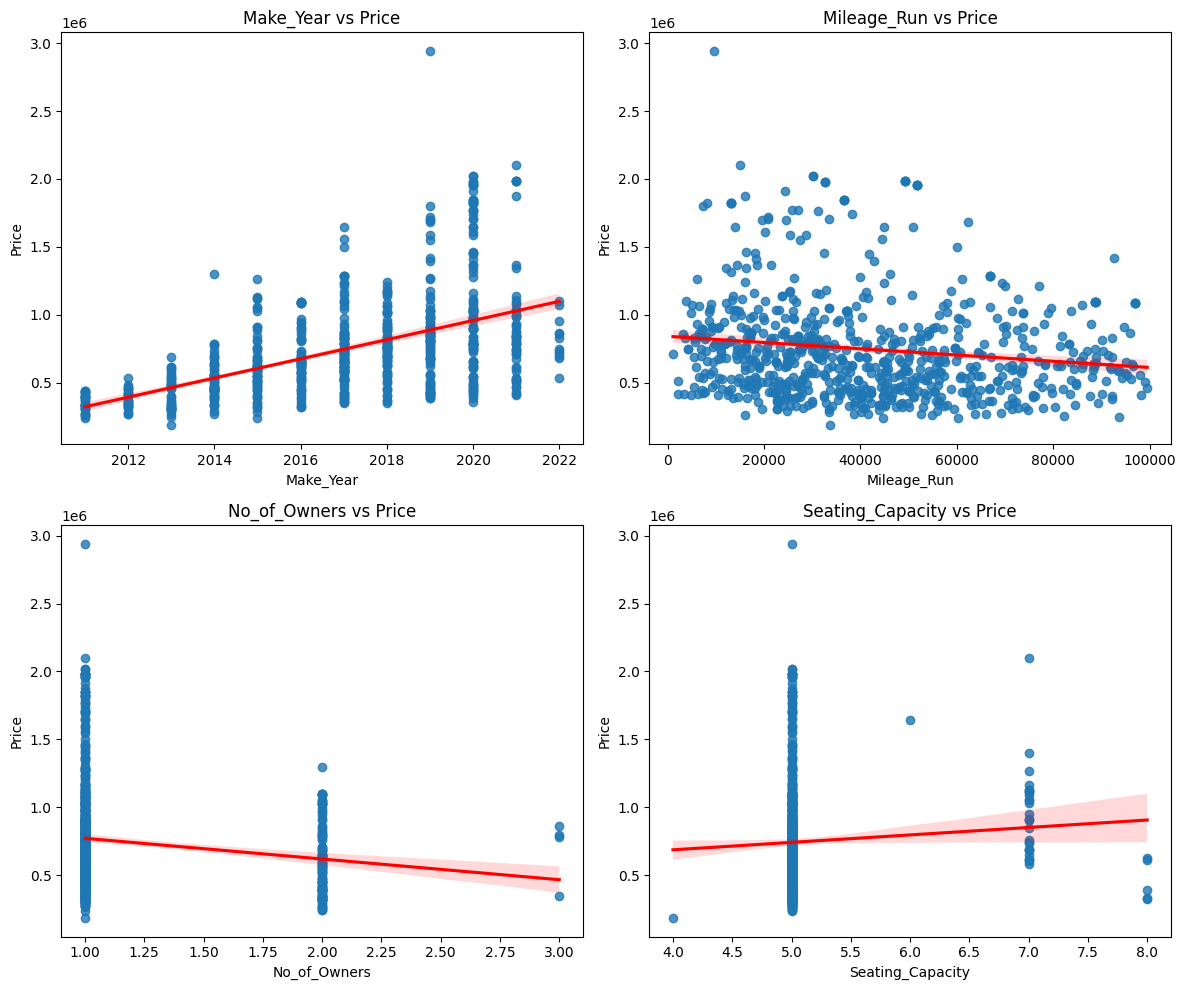

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confirmed numeric variables
numeric_vars = ['Make_Year', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity']

# Create scatter plots with regression lines
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, var in enumerate(numeric_vars):
    sns.regplot(x=X_train[var], y=y_train, ax=axs[i], line_kws={'color': 'red'})
    axs[i].set_title(f'{var} vs Price')

plt.tight_layout()
plt.show()

6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and R^2 on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create polynomial features (degree=2 includes interactions and squares)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Create a pipeline: polynomial transformation followed by linear regression
complex_model = make_pipeline(poly, LinearRegression())

# Fit the model on the training set
complex_model.fit(X_train, y_train)

# Predict on training and test sets
train_preds_poly = complex_model.predict(X_train)
test_preds_poly = complex_model.predict(X_test)

# Evaluate the model
train_rmse_poly = np.sqrt(mean_squared_error(y_train, train_preds_poly))
train_r2_poly = r2_score(y_train, train_preds_poly)

test_rmse_poly = np.sqrt(mean_squared_error(y_test, test_preds_poly))
test_r2_poly = r2_score(y_test, test_preds_poly)

# Print results
print("Complex Model with Polynomial Features:")
print("Training RMSE:", train_rmse_poly)
print("Training R²:", train_r2_poly)
print("Test RMSE:", test_rmse_poly)
print("Test R²:", test_r2_poly)

Complex Model with Polynomial Features:
Training RMSE: 77243.6834004364
Training R²: 0.9572534667634636
Test RMSE: 740032.5705817486
Test R²: -3.7748018769104794


The complex model overfits and generalizes poorly. The simpler linear and ridge models (with no interactions or minimal regularization) actually performed better overall and were more robust.

7.Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?

Through this project, I explored how different regression models perform on a car pricing dataset. I began with a simple linear regression model, which performed well with high R² values and low RMSE on both training and test sets, indicating good generalization. When I tried Ridge regression, the performance remained similar, suggesting that regularization wasn’t necessary for this dataset. However, a more complex polynomial model drastically overfit the training data, leading to a very high test RMSE and a negative R². This taught me that simpler models can often be more effective, and that overfitting is a serious concern when adding unnecessary complexity.